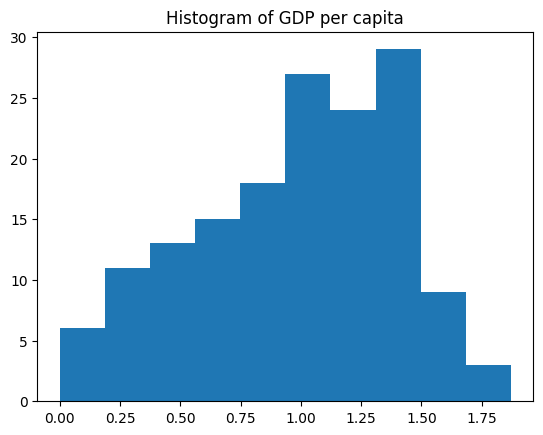

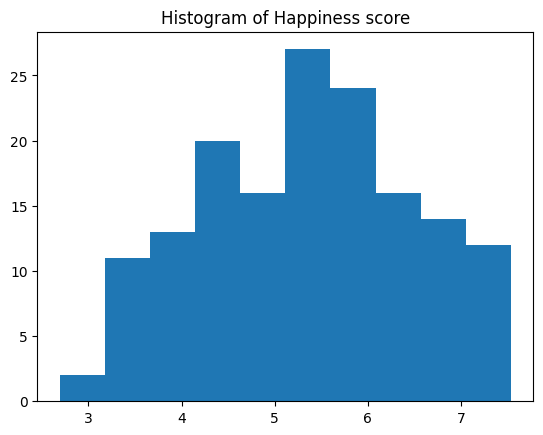

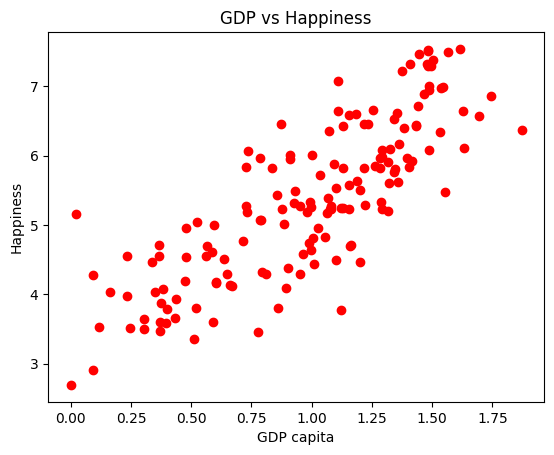

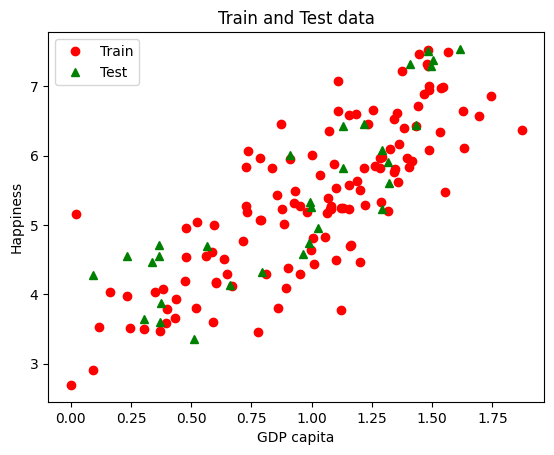

Model: f(x) = 3.1504 + 2.1961 * x


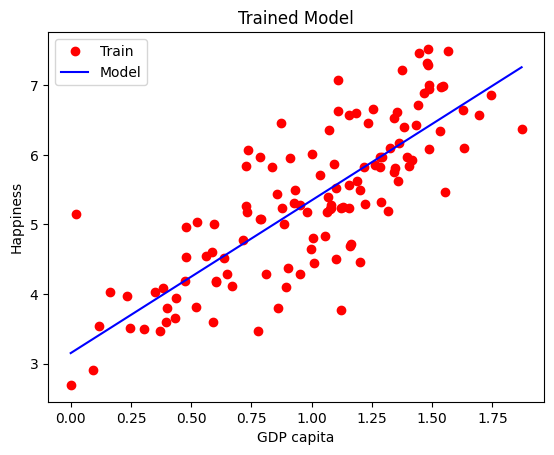

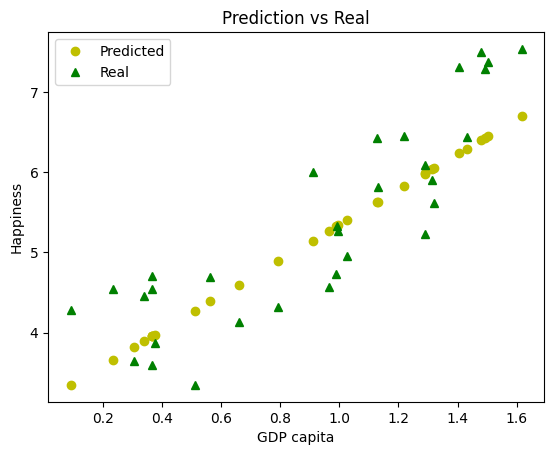

Manual MSE: 0.4139
sklearn MSE: 0.4139
Cross-validation MSEs: [0.36678819 0.45441659 0.43073082 0.45849365 0.49262678]
Average cross-validation MSE: 0.4406112057880801
Squared Loss MSE: 0.4608301895343765
Huber Loss MSE: 0.6997769732380341
Epsilon-Insensitive Loss MSE: 0.4580874460124511


In [10]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score, precision_recall_curve, auc

def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for i, row in enumerate(csv_reader):
            if i == 0:
                dataNames = row
            else:
                data.append(row)
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(row[selectedVariable]) for row in data]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(row[selectedOutput]) for row in data]
    return inputs, outputs

crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')
inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

plt.hist(inputs, 10)
plt.title('Histogram of GDP per capita')
plt.show()

plt.hist(outputs, 10)
plt.title('Histogram of Happiness score')
plt.show()

plt.plot(inputs, outputs, 'ro')
plt.xlabel('GDP capita')
plt.ylabel('Happiness')
plt.title('GDP vs Happiness')
plt.show()

np.random.seed(5)
indexes = np.arange(len(inputs))
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if i not in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

plt.plot(trainInputs, trainOutputs, 'ro', label='Train')
plt.plot(testInputs, testOutputs, 'g^', label='Test')
plt.legend()
plt.title('Train and Test data')
plt.xlabel('GDP capita')
plt.ylabel('Happiness')
plt.show()

xx = np.array([[el] for el in trainInputs])
yy = np.array(trainOutputs)
regressor = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000, random_state=42)
regressor.fit(xx, yy)
w0, w1 = regressor.intercept_[0], regressor.coef_[0]
print('Model: f(x) = {:.4f} + {:.4f} * x'.format(w0, w1))

xref = np.linspace(min(trainInputs), max(trainInputs), 1000)
yref = w0 + w1 * xref
plt.plot(trainInputs, trainOutputs, 'ro', label='Train')
plt.plot(xref, yref, 'b-', label='Model')
plt.legend()
plt.xlabel('GDP capita')
plt.ylabel('Happiness')
plt.title('Trained Model')
plt.show()

testPred = regressor.predict(np.array([[x] for x in testInputs]))
plt.plot(testInputs, testPred, 'yo', label='Predicted')
plt.plot(testInputs, testOutputs, 'g^', label='Real')
plt.legend()
plt.title('Prediction vs Real')
plt.xlabel('GDP capita')
plt.ylabel('Happiness')
plt.show()

manual_error = sum((p - r)**2 for p, r in zip(testPred, testOutputs)) / len(testOutputs)
sklearn_error = mean_squared_error(testOutputs, testPred)
print(f'Manual MSE: {manual_error:.4f}')
print(f'sklearn MSE: {sklearn_error:.4f}')

X = np.array([[x] for x in inputs])
y = np.array(outputs)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_errors = -cross_val_score(regressor, X, y, cv=kfold, scoring='neg_mean_squared_error')
print("Cross-validation MSEs:", cross_val_errors)
print("Average cross-validation MSE:", np.mean(cross_val_errors))

regressor_squared_loss = SGDRegressor(loss='squared_error', random_state=42).fit(X, y)
regressor_huber = SGDRegressor(loss='huber', random_state=42).fit(X, y)
regressor_epsilon_insensitive = SGDRegressor(loss='epsilon_insensitive', random_state=42).fit(X, y)

print("Squared Loss MSE:", mean_squared_error(y, regressor_squared_loss.predict(X)))
print("Huber Loss MSE:", mean_squared_error(y, regressor_huber.predict(X)))
print("Epsilon-Insensitive Loss MSE:", mean_squared_error(y, regressor_epsilon_insensitive.predict(X)))